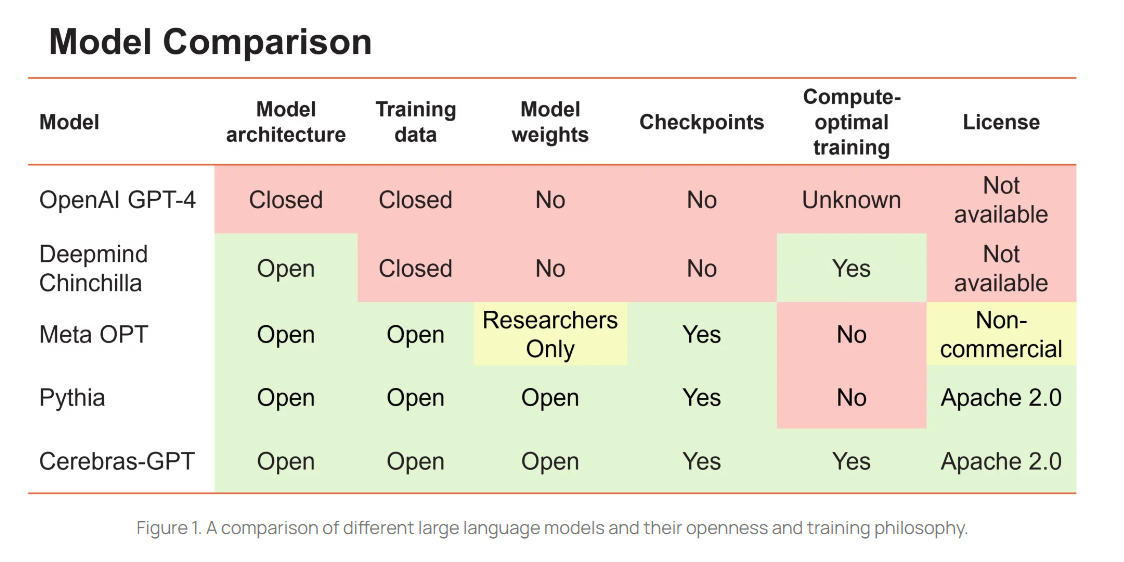

#### The most Interesting Fact about Cerebras is that **These Models are optimal for fixed compute budjet, not necessarily best for use.** This can be described using **Chinchilla formula**

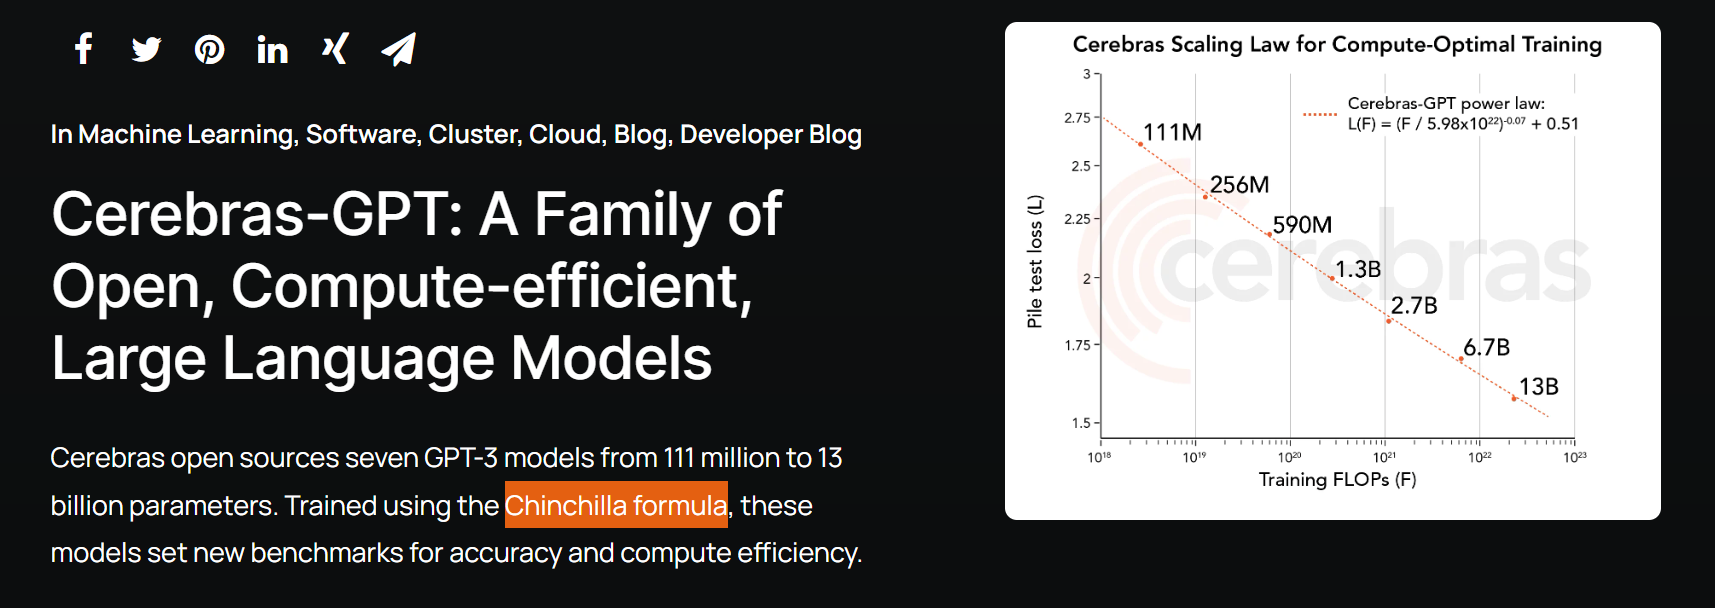

In [1]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline, GenerationConfig

In [3]:
model_name = "cerebras/Cerebras-GPT-6.7B"
# model_name = "cerebras/Cerebras-GPT-2.7B"
# model_name = "cerebras/Cerebras-GPT-13B"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

In [ ]:
text = "Generative AI is "

pipe = pipeline(
                "text-generation", 
                model=model, 
                tokenizer=tokenizer
                )

generated_text = pipe(
                    text, 
                    max_length=50, 
                    do_sample=False, 
                    no_repeat_ngram_size=2
                    )[0]
 
print(generated_text['generated_text'])

In [ ]:
text = "Unicorns can be found "

inputs = tokenizer(text, return_tensors="pt")

generation_config = GenerationConfig(
                                    temperature=0.6,
                                    top_p=0.95,
                                    repetition_penalty=1.2,
                                    )

outputs = model.generate(
                        **inputs, #the tokens
                        num_beams=5, 
                        max_new_tokens=150, 
                        early_stopping=True,
                        generation_config=generation_config,
                        no_repeat_ngram_size=2
                        )

text_output = tokenizer.batch_decode(
                                    outputs, 
                                    skip_special_tokens=True
                                    )

print(text_output[0])

In [ ]:
PROMPT = """Below is an instruction that describes a task. Write a response that appropriately completes the request.
### Instruction:
What are the differences between alpacas and sheep?
### Response:"""

generated_text = pipe(PROMPT, 
                      max_length=50, 
                      do_sample=False, 
                      no_repeat_ngram_size=2)[0]

                      
print(generated_text['generated_text'])

In [ ]:
PROMPT = """the differences between alpacas and sheep are"""

generated_text = pipe(
                      PROMPT, 
                      max_length=150, 
                      do_sample=False, 
                      no_repeat_ngram_size=2
                      )[0]
                      
print(generated_text['generated_text'])